# Importing Required packages

In [1]:
!pip install yfinance
!pip install fredapi
!pip install cbpro
!pip install pytz
import yfinance as yf
from fredapi import Fred
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import urllib3
import json


Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.13.0
    Uninstalling requests-2.13.0:
      Successfully uninstalled requests-2.13.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
cbpro 1.1.4 requires requests==2.13.0, but you have requests 2.31.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.
anaconda-client 1.11.0 requires six>=1.15.0, but you have six 1.10.0 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.13.0-py2.py3-none-any.whl (584 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
yfinance 0.2.12 requires requests>=2.26, but you have requests 2.13.0 which is incompatible.
tensorboard 2.12.0 requires requests<3,>=2.21.0, but you have requests 2.13.0 which is incompatible.
pandas-datareader 0.10.0 requires requests>=2.19.0, but you have requests 2.13.0 which is incompatible.
openai 0.26.5 requires requests>=2.20, but you have requests 2.13.0 which is incompatible.
geoip2 4.6.0 requires requests<3.0.0,>=2.24.0, but you have requests 2.13.0 which is incompatible.
cookiecutter 1.7.3 requires requests>=2.23.0, but you have requests 2.13.0 which is incompatible.
conda 22.9.0 requires requests>=2.20.1, but you have requests 2.13.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which

Defaulting to user installation because normal site-packages is not writeable


# Downloading Data from Yahoo Finance!

In [2]:
#ticker
ticker = 'DOGE-USD'
#setting the period
start_date1 = '2017-12-01'
end_date1 = '2023-05-31'
#retrieving dataset
data1 = yf.download(ticker, start=start_date1, end=end_date1)['Adj Close']
# Extract the returns for the current asset
returns = data1.pct_change().dropna()
returns
#setting the window size

[*********************100%***********************]  1 of 1 completed


C:\Anaconda3\lib\site-packages\cryptography\hazmat\backends\openssl\x509.py:14: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  warnings.warn(


Date
2017-12-02    0.000466
2017-12-03    0.034435
2017-12-04    0.107962
2017-12-05    0.006496
2017-12-06    0.074223
                ...   
2023-05-26    0.001538
2023-05-27    0.023935
2023-05-28    0.012795
2023-05-29   -0.005814
2023-05-30   -0.011259
Name: Adj Close, Length: 2006, dtype: float64

<AxesSubplot:xlabel='Date'>

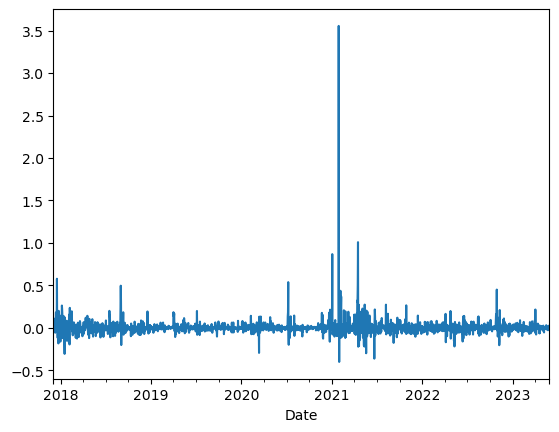

In [3]:
returns.plot()

<AxesSubplot:>

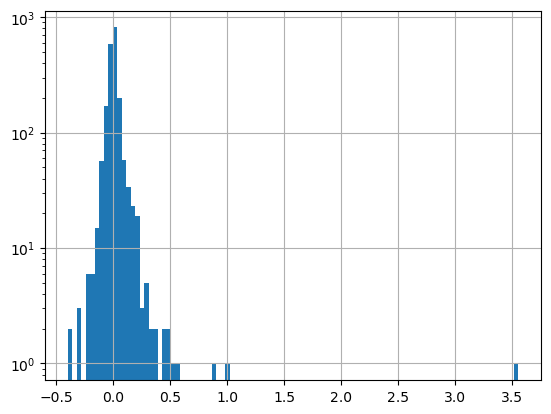

In [4]:
returns.hist(bins=100, log=True)

In [5]:
date_list = returns.index
returns = pd.DataFrame(returns)
returns.reset_index(drop=True, inplace=True)
returns['Date'] = date_list
returns['Date'] = returns['Date'] + pd.DateOffset(days=1)

In [6]:
returns

,Adj Close,Date
0,0.000466,2017-12-03
1,0.034435,2017-12-04
2,0.107962,2017-12-05
3,0.006496,2017-12-06
4,0.074223,2017-12-07
...,...,...
2001,0.001538,2023-05-27
2002,0.023935,2023-05-28
2003,0.012795,2023-05-29
2004,-0.005814,2023-05-30


# Scraping Twits from StockTwits

In [11]:
http = urllib3.PoolManager()
ticker = "DOGE.X"
rows = []
for l in range(0, 50000):
    if l == 0:
        url = f"https://api.stocktwits.com/api/2/streams/symbol/{ticker}.json"
    else:
        url = f"https://api.stocktwits.com/api/2/streams/symbol/{ticker}.json?max=" + str(lid)
    print(url)

    r = http.request('GET', url)
    data = json.loads(r.data)

    for t in data["messages"]:
        lid = t["id"]
        date = t["created_at"]
        text = t["body"]
        sentiment = t["entities"]["sentiment"]

        if sentiment == None:
            sentiment = np.nan
        else:
            sentiment = sentiment["basic"]
            if sentiment == "Bullish":
                sentiment = 1
            if sentiment == "Bearish":
                sentiment = -1
        rows.append((date, text, sentiment))

df = pd.DataFrame(rows, columns=["date","text","sentiment"])

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531560138
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531558606
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531556969
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531555424
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531554255
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531553181
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531552489
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531551856
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531550965
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531549761
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531548198
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=531547037
https://api.stocktwits.com/api/2/streams/symbol/DOGE

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530780241
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530768901
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530762342
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530745389
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530734999
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530721889
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530714954
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530708880
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530704731
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530699790
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530697905
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530695684
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=530686186
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529763005
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529755683
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529748121
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529743605
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529740204
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529738041
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529735242
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529734571
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529731902
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529730006
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529723511
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529721162
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=529713280
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528520287
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528515985
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528507047
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528497761
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528494123
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528490188
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528473450
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528450014
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528438959
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528400012
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528368839
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528346583
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=528332237
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527231454
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527215835
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527202733
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527192473
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527168692
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527144770
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527119832
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527099057
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527083059
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527075072
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527068374
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527055424
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=527026698
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525940585
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525932675
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525927693
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525923033
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525914354
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525909502
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525894732
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525870686
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525850555
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525828443
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525806063
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525775152
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=525729516
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524505578
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524500295
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524494717
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524492495
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524485068
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524463928
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524438318
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524420141
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524403495
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524371019
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524341738
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524322654
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=524314421
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523802869
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523801474
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523800434
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523800040
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523799481
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523797594
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523793841
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523791444
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523788487
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523782973
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523776430
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523773954
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523764157
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523172756
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523171247
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523170019
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523167239
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523165137
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523161917
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523155802
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523151870
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523146758
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523143558
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523138410
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523133215
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=523126805
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522363886
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522346507
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522332427
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522324834
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522322274
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522317602
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522315121
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522313045
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522310975
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522308997
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522308099
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522306055
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=522302969
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521977046
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521973677
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521971607
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521969832
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521968303
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521966512
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521964547
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521962349
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521960608
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521958548
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521957219
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521955668
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521954091
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521504459
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521500333
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521496661
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521493906
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521490155
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521487522
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521484203
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521480782
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521478218
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521474773
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521472095
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521469078
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521464637
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521345824
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521345071
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521344189
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521342877
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521341626
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521340659
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521339315
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521338482
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521337874
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521337154
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521336630
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521335942
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521334949
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521142303
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521141811
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521141023
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521140008
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521139120
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521138279
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521137177
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521136375
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521135911
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521135423
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521135092
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521134817
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=521134129
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520383794
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520379738
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520375967
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520371430
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520366892
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520361749
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520349951
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520324653
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520303283
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520268071
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520239549
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520190021
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=520166014
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519134810
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519128669
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519117315
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519082997
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519033433
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519023487
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519019618
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519012248
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519006640
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=519002376
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518998039
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518993634
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518979941
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518040211
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518039294
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518037676
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518036652
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518035699
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518034116
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518025766
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=518003914
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517964024
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517919807
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517867174
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517819158
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=517812163
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516677840
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516652962
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516636424
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516631854
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516625015
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516616164
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516612533
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516607750
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516603198
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516596624
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516592360
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516588263
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=516582270
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=515063027
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=515043916
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=515005958
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514970090
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514916676
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514866392
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514842784
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514830884
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514824537
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514818127
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514806750
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514784062
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=514766449
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513316671
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513311390
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513305910
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513298951
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513293112
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513281748
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513273308
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513261908
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513254110
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513245467
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513233453
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513226672
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=513220428
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512361013
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512359887
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512358885
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512358200
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512357639
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512357201
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512356889
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512356645
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512356428
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512349723
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512340379
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512330149
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=512318634
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511219778
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511210772
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511200955
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511192751
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511175338
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511143661
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511123403
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511101001
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511093394
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511064997
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511029464
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=511000030
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510993002
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510345753
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510341946
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510339596
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510335849
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510333122
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510330415
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510328735
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510324119
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510321292
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510319251
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510317485
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510314941
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=510312394
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509370756
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509366524
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509363416
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509361733
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509359089
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509346895
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509338485
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509329083
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509317955
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509310261
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509304974
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509297260
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=509290566
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508940219
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508934968
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508930028
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508926021
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508923060
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508920743
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508919543
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508918752
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508917573
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508917070
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508916384
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508915860
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=508915370
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507778896
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507763780
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507752362
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507740226
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507736417
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507733700
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507732836
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507732227
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507731572
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507730688
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507728955
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507727504
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507727059
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507540726
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507536512
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507529511
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507524128
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507520957
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507517452
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507506079
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507483847
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507470922
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507454726
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507423795
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507394437
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=507386772
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506629456
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506624509
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506616148
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506605909
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506603854
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506602130
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506600178
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506599154
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506596719
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506594288
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506591585
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506589634
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506588948
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506403994
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506402173
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506399322
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506397157
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506395095
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506393475
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506391733
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506388485
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506384647
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506378446
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506368624
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506354731
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=506341804
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505574445
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505552577
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505530223
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505514265
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505508416
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505502178
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505495915
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505490294
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505487682
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505483482
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505478196
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505476534
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=505473444
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504818364
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504813727
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504802118
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504784145
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504745571
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504721892
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504691715
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504658382
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504640452
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504621949
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504617935
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504616726
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504615561
https://api.stocktwits.com/api/2/strea

https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504073484
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504071968
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504070502
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504069568
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504068609
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504066341
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504065128
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504064085
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504061395
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504059629
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504058194
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504056966
https://api.stocktwits.com/api/2/streams/symbol/DOGE.X.json?max=504055251
https://api.stocktwits.com/api/2/strea

In [12]:
# Convert the 'Timestamp' column to datetime type
df['date'] = pd.to_datetime(df['date'])
# Convert the timestamps from GMT to CET
df['date'] = df['date'].dt.tz_convert('Europe/Paris')

In [13]:
df

,date,text,sentiment
0,2023-06-10 20:53:48+02:00,$DOGE.X if your so sure then why don’t you let...,1.0
1,2023-06-10 20:52:55+02:00,$DOGE.X tit for tat lol,-1.0
2,2023-06-10 20:51:51+02:00,$DOGE.X wait I thought $1,NaN
3,2023-06-10 20:50:46+02:00,$DOGE.X think of those pro athletes who got pa...,NaN
4,2023-06-10 20:49:53+02:00,$DOGE.X Hmmmmmm,NaN
...,...,...,...
104994,2022-12-30 21:36:08+01:00,$DOGE.X let&#39;s face it. New doge pumpers th...,1.0
104995,2022-12-30 21:31:49+01:00,$DOGE.X Is Robinhood safe to keep my doge? Or ...,NaN
104996,2022-12-30 21:28:09+01:00,$DOGE.X i been told yall take some profit at ....,-1.0
104997,2022-12-30 21:25:31+01:00,$DOGE.X,-1.0


In [14]:
# Number of positive and negative stocktwitz in the dataset
positive_count = df[df['sentiment'] == 1].shape[0]
negative_count = df[df['sentiment'] == -1].shape[0]

print("Positive count:", positive_count)
print("Negative count:", negative_count)

Positive count: 70727
Negative count: 4875


In [16]:
# Remove timezone from columns
df['date'] = df['date'].dt.tz_localize(None)

df.to_excel('stocktwits_data.xlsx')

In [20]:
df1 = df.dropna(subset=['sentiment'])

In [25]:
df1_pos = df[df['sentiment']==1]
df1_pos

,date,text,sentiment
0,2023-06-10 20:53:48,$DOGE.X if your so sure then why don’t you let...,1.0
7,2023-06-10 20:48:01,$DOGE.X moon memey woah,1.0
11,2023-06-10 20:44:49,$DOGE.X on its way to 10 cents 💋,1.0
14,2023-06-10 20:39:01,$DOGE.X,1.0
15,2023-06-10 20:38:25,$BTC.X just gold $ETH.X $DOGE.X $SHIB.X \nHed...,1.0
...,...,...,...
104989,2022-12-30 21:42:53,$DOGE.X new year will go ATH,1.0
104992,2022-12-30 21:37:13,$DOGE.X I drew a Picasso las night. It had elo...,1.0
104993,2022-12-30 21:36:54,$DOGE.$DOGE.X shorties all life FAAAWK,1.0
104994,2022-12-30 21:36:08,$DOGE.X let&#39;s face it. New doge pumpers th...,1.0


In [72]:
len(df1_pos)/len(df1)

0.9355175789000291

# I. Classification with Different Dataset Sizes

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

## A.1 Unbalanced Dataset(n=500)

In [39]:
df1_sample = df1.sample(n=500, random_state=42)

In [47]:
#proportion of bullish sentiments
len(df1_sample[df1_sample['sentiment']==1])/len(df1_sample)

0.924

In [42]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df1_sample['text'])
y = df1_sample['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Apply classifier
clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation
np.mean(scores)

clf.fit(X_train,y_train)
preds_clf = clf.predict(X_test)
accuracy_score(y_test,preds_clf)

0.872

## A.2 Unbalanced Dataset(n=1000)

In [49]:
df2_sample = df1.sample(n=1000, random_state=42)
#proportion of bullish sentiments
len(df2_sample[df2_sample['sentiment']==1])/len(df2_sample)

0.935

In [50]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df2_sample['text'])
y = df2_sample['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Apply classifier
clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation
np.mean(scores)

clf.fit(X_train,y_train)
preds_clf = clf.predict(X_test)
accuracy_score(y_test,preds_clf)

0.908

## A.2 Unbalanced Dataset(n=2500)

In [55]:
df3_sample = df1.sample(n=2500, random_state=42)
#proportion of bullish sentiments
len(df3_sample[df3_sample['sentiment']==1])/len(df3_sample)

0.9348

In [56]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df3_sample['text'])
y = df3_sample['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Apply classifier
clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation
np.mean(scores)

clf.fit(X_train,y_train)
preds_clf = clf.predict(X_test)
accuracy_score(y_test,preds_clf)

0.9104

## A.3 Unbalanced Dateset (n=5000)

In [57]:
df4_sample = df1.sample(n=5000, random_state=42)
#proportion of bullish sentiments
len(df4_sample[df4_sample['sentiment']==1])/len(df4_sample)

0.935

In [58]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df4_sample['text'])
y = df4_sample['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Apply classifier
clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation
np.mean(scores)

clf.fit(X_train,y_train)
preds_clf = clf.predict(X_test)
accuracy_score(y_test,preds_clf)

0.9176

## A.4 Unbalanced Dataset(n=10000)

In [67]:
df5_sample = df1.sample(n=10000, random_state=42)
#proportion of bullish sentiments
len(df5_sample[df5_sample['sentiment']==1])/len(df5_sample)

0.932

In [68]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df5_sample['text'])
y = df5_sample['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Apply classifier
clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation
np.mean(scores)

clf.fit(X_train,y_train)
preds_clf = clf.predict(X_test)
accuracy_score(y_test,preds_clf)

0.914

## A.5 Unbalanced Dataset(n=25000)

In [70]:
df6_sample = df1.sample(n=25000, random_state=42)
#proportion of bullish sentiments
len(df6_sample[df6_sample['sentiment']==1])/len(df6_sample)

0.93532

In [71]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df6_sample['text'])
y = df6_sample['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Apply classifier
clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation
np.mean(scores)

clf.fit(X_train,y_train)
preds_clf = clf.predict(X_test)
accuracy_score(y_test,preds_clf)

0.93248

## A.6 Unbalanced Dataset(n=50000)

In [73]:
df7_sample = df1.sample(n=50000, random_state=42)
#proportion of bullish sentiments
len(df7_sample[df7_sample['sentiment']==1])/len(df7_sample)

0.9363

In [74]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df7_sample['text'])
y = df7_sample['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Apply classifier
clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation
np.mean(scores)

clf.fit(X_train,y_train)
preds_clf = clf.predict(X_test)
accuracy_score(y_test,preds_clf)

0.9328

# II. Classification with Varying ngrams

## A.7 Unbalanced Dataset(n=100000)

In [75]:
df8_sample = df1.sample(n=50000, random_state=42)
#proportion of bullish sentiments
len(df8_sample[df8_sample['sentiment']==1])/len(df8_sample)

0.9363

In [76]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df8_sample['text'])
y = df8_sample['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

# Apply classifier
clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation
np.mean(scores)

clf.fit(X_train,y_train)
preds_clf = clf.predict(X_test)
accuracy_score(y_test,preds_clf)

0.9328

# III. Classification with Different Text Processing Methods

## Benchmark

unigram and bigram text features without text preprocessing

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Prepare data
# Here, ngram_range=(1, 2) generates unigrams and bigrams
count_vectorizer = CountVectorizer(lowercase=False, tokenizer=lambda x: x, ngram_range=(1, 2))
X = count_vectorizer.fit_transform(df['text'])
y = df['sentiment']  # labels corresponding to your text data

# Apply classifier
clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Punctuation

In [ ]:
from nltk.tokenize import WordPunctTokenizer

# Tokenize using WordPunctTokenizer which keeps punctuation
tokenizer = WordPunctTokenizer()
tokenized_text = [tokenizer.tokenize(i) for i in text]
lower_text = [[word.lower() for word in sent] for sent in tokenized_text]


# Prepare data
X = count_vectorizer.fit_transform(lower_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

## Stem

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_sentence(sentence):
   return [stemmer.stem(word) for word in sentence]

lowered_text = [[word.lower() for word in sent] for sent in text_list]
stemmed_text = [stem_sentence(sentence) for sentence in lowered_text] #handle the source please


# Prepare data
X = count_vectorizer.fit_transform(stemmed_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

## Emoticons

In [ ]:
import emoji

def handle_emojis(text):
   # Translate the emoji into word strings
   return emoji.demojize(text, delimiters=(' ', ' '))

handled_emoji_text = [handle_emojis(sentence) for sentence in lowered_text]


X = count_vectorizer.fit_transform(handled_emoji_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

In [ ]:
# Prepare data
X = count_vectorizer.fit_transform(stemmed_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

## StopWords

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence):
   return [word for word in sentence if word not in stop_words]

no_stopwords_text = [remove_stopwords(sentence) for sentence in lowered_text]

X = count_vectorizer.fit_transform(no_stopwords_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

## PosTagin

In [ ]:
from nltk import pos_tag

def add_pos_tag(sentence):
   return [f"{word}_{tag}" for word, tag in pos_tag(sentence)]

pos_tagged_text = [add_pos_tag(sentence) for sentence in lowered_text]


# Prepare data
X = count_vectorizer.fit_transform(pos_tagged_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

## Emojis + Punctuation

In [ ]:
# Tokenize using WordPunctTokenizer which keeps punctuation
tokenizer = WordPunctTokenizer()
tokenized_text = [tokenizer.tokenize(i) for i in text]
lower_text = [[word.lower() for word in sent] for sent in tokenized_text]
handled_emoji_text = [handle_emojis(sentence) for sentence in lower_text]

X = count_vectorizer.fit_transform(handled_emoji_text)

# Apply classifier
scores = cross_val_score(clf, X, y, cv=10)  # 10-fold cross-validation

# IV. Classification with Different Machine Learning Methods

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression  # MaxEnt
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import time

# Preprocessing
# Assume: tokenized_text is your preprocessed data

# Prepare data
count_vectorizer = CountVectorizer(lowercase=False, tokenizer=lambda x: x, ngram_range=(1, 2), min_df=0.0001)
X = count_vectorizer.fit_transform(tokenized_text)
y = labels  # labels corresponding to your text data

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and parameters
models = {
   "Naive Bayes": MultinomialNB(),
   "MaxEnt": LogisticRegression(max_iter=1000), 
   "SVC": LinearSVC(max_iter=1000), 
   "RF": RandomForestClassifier(),
   "MLP": MLPClassifier(max_iter=1000),
}
params = {
   "Naive Bayes": {"alpha": [0.1, 1.0, 10.0]},
   "MaxEnt": {"C": [0.1, 1.0, 10.0]},
   "SVC": {"C": [0.1, 1.0, 10.0]},
   "RF": {"n_estimators": [100, 200, 300]},
   "MLP": {"hidden_layer_sizes": [(50,), (100,)], "learning_rate_init": [0.001, 0.01]}
}

# Grid search, cross-validation, training, and testing
for name, model in models.items():
   gs = GridSearchCV(model, params[name], cv=3, n_jobs=-1)  # 3-fold cross-validation
   start = time.time()
   gs.fit(X_train, y_train)
   end = time.time()
   print(f"Best parameters for {name}: {gs.best_params_}")
   print(f"Best cross-validated score for {name}: {gs.best_score_}")

   # Train and test on best parameters
   best_model = gs.best_estimator_
   best_model.fit(X_train, y_train)
   predictions = best_model.predict(X_test)

   print(f"Accuracy on test set for {name}: {accuracy_score(y_test, predictions)}")
   print(f"Classification report for {name}:\n {classification_report(y_test, predictions)}")

   print(f"Time needed for {name}: {end - start} seconds")